In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [55]:
with open('full_list_final.pickle', 'rb') as infile:
    final=pickle.load(infile)

infile.close()

In [56]:
df_types = pd.read_csv('anime_types.csv', index_col = 0)

In [57]:
df = pd.DataFrame.from_dict(final)

In [58]:
df = df[['title', 'genres', 'user', 'ratings']]

In [54]:
len(df['user'].unique())

41018

In [61]:
df['ratings'] = df['ratings'].replace('', value = 0)

In [62]:
df['ratings'] = df['ratings'].astype('float64')

In [63]:
# RUN THIS ONLY ONCE!!
df.ratings = df.ratings*2

In [64]:
df['ratings'] = df['ratings'].astype('int64')

In [65]:
df = df.merge(df_types, left_on = 'title', right_on = 'title')

### Include users who only reviewed more than 5 Animes

In [67]:
df1 = df.groupby('user').filter(lambda x: len(x) > 5)

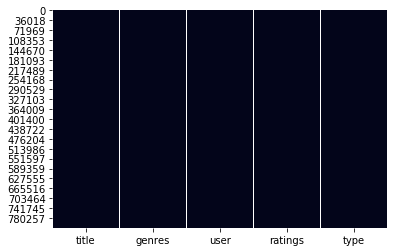

In [68]:
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767524 entries, 0 to 818489
Data columns (total 5 columns):
title      767524 non-null object
genres     767524 non-null object
user       767524 non-null object
ratings    767524 non-null int64
type       767524 non-null object
dtypes: int64(1), object(4)
memory usage: 35.1+ MB


In [70]:
df1['User_ID'] = df1.groupby('user').grouper.group_info[0]

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
df1['Title_ID'] = df1.groupby('title').grouper.group_info[0]

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
df1[df1.user == '004'].head()

,title,genres,user,ratings,type,User_ID,Title_ID
2,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",004,10,TV,3,1244
1252,Hunter x Hunter (2011),"[Action, Adventure, Drama, Fantasy]",004,7,TV,3,1767
2082,Steins;Gate,"[Sci Fi, Conspiracy, LGBT Themes, Psychological]",004,10,TV,3,3833
2272,Code Geass: Lelouch of the Rebellion R2,"[Mecha, Sci Fi, Conspiracy, Mind Games]",004,8,TV,3,682
4816,Spirited Away,"[Adventure, Fantasy, Curse, Family Friendly]",004,7,Movie,3,3808


### Drop Users For Confidentiallity 

In [73]:
df2 = df1.drop(columns=['user'])

### Drop Music Videos From Type

In [74]:
df2 = df2[df2['type'] != 'Video']

### Drop 0 ratings From Users

In [75]:
df2 = df2[df2['ratings'] != 0]

In [76]:
df2.head()

,title,genres,ratings,type,User_ID,Title_ID
0,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",8,TV,0,1244
2,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",10,TV,3,1244
3,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",10,TV,5,1244
4,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",10,TV,6,1244
5,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",6,TV,14,1244


In [77]:
df2.describe()

,ratings,User_ID,Title_ID
count,478058.000000,478058.000000,478058.000000
mean,7.429446,6026.172456,2322.318120
std,1.860239,4881.927608,1350.020636
min,1.000000,0.000000,0.000000
25%,6.000000,1448.000000,1156.000000
50%,8.000000,4640.000000,2329.000000
75%,9.000000,10839.000000,3497.000000
max,10.000000,16194.000000,4661.000000


In [78]:
df2[df2.Title_ID == 142].head()

,title,genres,ratings,type,User_ID,Title_ID
307542,Aldnoah.Zero 2nd Season,"[Action, Mecha, Sci Fi, Conspiracy]",10,TV,9,142
307544,Aldnoah.Zero 2nd Season,"[Action, Mecha, Sci Fi, Conspiracy]",7,TV,47,142
307545,Aldnoah.Zero 2nd Season,"[Action, Mecha, Sci Fi, Conspiracy]",8,TV,46,142
307546,Aldnoah.Zero 2nd Season,"[Action, Mecha, Sci Fi, Conspiracy]",8,TV,84,142
307547,Aldnoah.Zero 2nd Season,"[Action, Mecha, Sci Fi, Conspiracy]",8,TV,85,142


### Final DataFrame to CSV For Model

In [48]:
df2.to_csv('anime_data.csv')